# Task 1

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

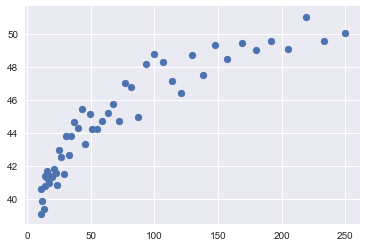

In [2]:
df = pd.read_csv('task-1.csv')
x = df.x.values
y = df.y.values
sns.set()
plt.scatter(x,y)

In [3]:
coef = np.polyfit(np.log(x),y,deg=1)
a,b = coef
print('a:',a)
print('b:',b)

a: 3.3902409977137995
b: 31.52920121929614


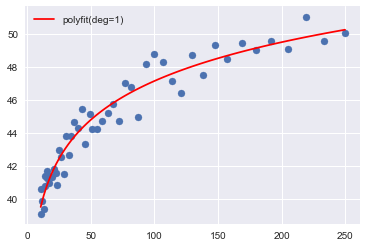

In [4]:
x_values = np.linspace(min(x),max(x),num=100)
y_values = np.polyval(coef,np.log(x_values))
plt.scatter(x,y)
plt.plot(x_values,y_values,color='red',label='polyfit(deg=1)')
plt.legend()
plt.show()

In [5]:
y_pred = a*np.log(x)+b
RSS_model = np.sum(np.square(y-y_pred))
RSS_baseline = np.sum(np.square(y-y.mean()))
R_squared = 1 - RSS_model/RSS_baseline
print('R_squared:',R_squared)

R_squared: 0.9411567093138288


Polyfit() function find coeffients by minimizing the squared error.

First difference: Gradient descent uses a learning rate and the gradient of the loss function to compute the parameters update and gradually get to the optimal parameters (zero gradient), while polyfit() has a defined loss function. 
Second difference: Gradient descent is an iterative algorithm, and polyfit() is not. 

# Task 2

In [9]:
df = pd.read_csv('task-2.csv')
X = df.drop('y',axis=1).values
y = df.y.values
# Split data
from sklearn.model_selection import train_test_split
X_tr,X_te,y_tr,y_te = train_test_split(X,y,train_size = 0.8,test_size=0.2,random_state=0)

In [10]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_tr,y_tr)
y_pred = lr.predict(X_te)

In [11]:
def MAE(y,y_pred):
    return np.mean(np.abs(y_te - y_pred))

mae = MAE(y,y_pred)
print('MAE of linear regression:',mae)

MAE of linear regression: 104.78843301492127


HUBER regression with outliers

In [12]:
from sklearn.linear_model import HuberRegressor
lr_huber = HuberRegressor()
lr_huber.fit(X_tr,y_tr)
y_pred = lr_huber.predict(X_te)
mae = MAE(y,y_pred)
print('MAE of Huber Regression:',mae)

MAE of Huber Regression: 83.9081241620586


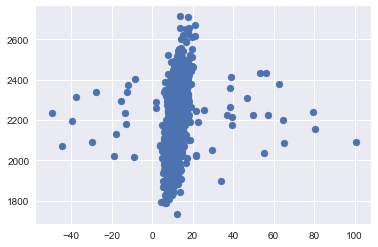

In [13]:
# Have a view of data points and identifying outliers
plt.scatter(df.x1.values,df.y.values)

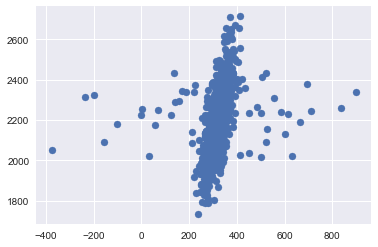

In [14]:
plt.scatter(df.x2.values,df.y.values)

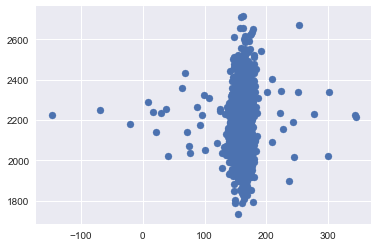

In [15]:
plt.scatter(df.x3.values,df.y.values)

In [16]:
# use z-score to remove outliers 
def z_scores(x):
    return (x - x.mean())/x.std()

x1 = df.x1.values 
z1 = z_scores(x1)
idx1 = np.abs(z1)>2

x2 = df.x2.values
z2 = z_scores(x2)
idx2 = np.abs(z2)>2

x3 = df.x3.values 
z3 = z_scores(x3)
idx3 = np.abs(z3)>2

idx = idx1|idx2|idx3
df_n = df[~idx]
df_n.shape

(951, 4)

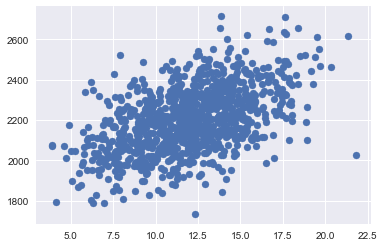

In [17]:
# View data points after removing outliers
plt.scatter(df_n.x1.values,df_n.y.values)

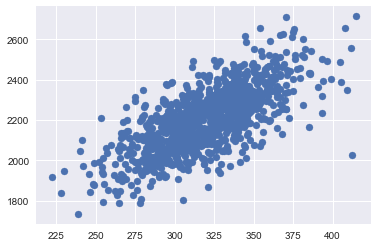

In [18]:
plt.scatter(df_n.x2.values,df_n.y.values)

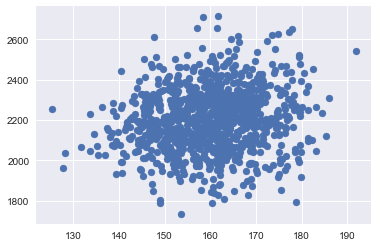

In [19]:
plt.scatter(df_n.x3.values,df_n.y.values)

In [20]:
X = df_n.drop('y',axis=1).values
y = df_n.y.values
# split data 
X_tr,X_te,y_tr,y_te = train_test_split(X,y,train_size = 0.8,test_size=0.2,random_state=0)
lr = LinearRegression()
lr.fit(X_tr,y_tr)
y_pred = lr.predict(X_te)

mae = MAE(y,y_pred)
print('MAE of model without outliers:',mae)

MAE of model without outliers: 51.1778150086515


# Task 3

In [21]:
df = pd.read_csv('task-3.csv')
df.head()

,x,y
0,3.588,0.473
1,3.551,0.784
2,3.610,0.847
3,3.704,0.904
4,3.716,1.118


In [22]:
x = df.x.values
y = df.y.values
x_tr, x_te, y_tr, y_te = train_test_split(x, y, train_size=0.5, test_size=0.5, random_state=0)

In [23]:
from sklearn.preprocessing import PolynomialFeatures
poly_obj = PolynomialFeatures(degree=10,include_bias=False)
X_poly = poly_obj.fit_transform(x_tr[:,np.newaxis])

In [24]:
linreg = LinearRegression()
linreg.fit(X_poly,y_tr)
X_te = poly_obj.fit_transform(x_te[:,np.newaxis])
y_pred = linreg.predict(X_te)
rss = np.sum(np.square(y_te,y_pred))
print('RSS:',rss)

RSS: 32.208844


In [25]:
# Linear regression coefficients
features = poly_obj.get_feature_names()
for feature, coef in zip(features, linreg.coef_):
    print('{}: {:.1f}'.format(feature, coef))

x0: 52342645.5
x0^2: 8353048.7
x0^3: -46990117.2
x0^4: 37177886.5
x0^5: -15688207.9
x0^6: 4119761.9
x0^7: -697004.1
x0^8: 74304.2
x0^9: -4560.5
x0^10: 123.2


Coefficients are very very large, the model is probably overfit. 

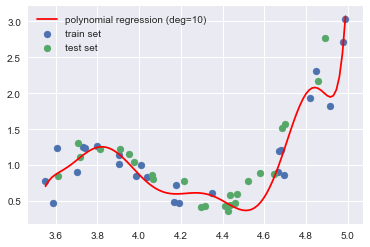

In [26]:
x_values = np.linspace(min(x),max(x),num=100)
x_values2 = poly_obj.transform(x_values[:, np.newaxis])
y_values = linreg.predict(x_values2)
plt.scatter(x_tr,y_tr,label='train set')
plt.scatter(x_te,y_te,label='test set')
plt.plot(x_values,y_values,label='polynomial regression (deg=10)',color='red')
plt.legend()
plt.show()

Look at model and test set, we can conclude that the model is overfit

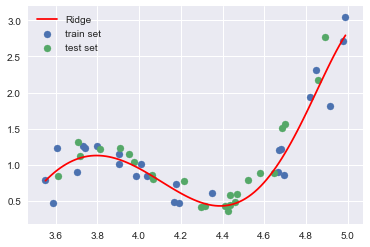

In [28]:
# Apply regularization using Ridge Regression
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_poly,y_tr)
y_values = ridge.predict(x_values2)
plt.scatter(x_tr,y_tr,label='train set')
plt.scatter(x_te,y_te,label='test set')
plt.plot(x_values,y_values,label='Ridge',color='red')
plt.legend()
plt.show()

In [29]:
y_pred_tr = ridge.predict(X_poly)
y_pred_te = ridge.predict(X_te)
rss_tr = np.sum(np.square(y_tr,y_pred_tr))
rss_te = np.sum(np.square(y_te,y_pred_te))
print('train RSS:', rss_tr)
print('test RSS:', rss_te)

train RSS: 47.484058
test RSS: 32.208844


Remark on regularization strength alpha: no need to tune alpha, given that default alpha (equals one) fits data pretty well.